In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('spam.csv')

In [5]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4657,ham,This message is from a great Doctor in India:-...,NaN,NaN,NaN
1298,ham,Your daily text from me ??? a favour this time,NaN,NaN,NaN
2812,ham,Enjoy the showers of possessiveness poured on ...,NaN,NaN,NaN
3389,spam,Please CALL 08712402972 immediately as there i...,NaN,NaN,NaN
1816,ham,Are you going to write ccna exam this week??,NaN,NaN,NaN


In [6]:
df.shape

(5572, 5)

In [ ]:
# 1 data cleaning (removing nan values,missing values,duplicate values)
# 2 EDA(Exploratory data analysis)
# 3 Text Preprocessing(vacterization , steming,stop words)
# 4 Model building(text vectorize)
# 5 Evaluation
# 6 Improvements
# 7 website
# 8 deployment

1 data cleaning

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [8]:
# drop last 3 cols
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [10]:
df.sample(5)

,v1,v2
3935,ham,They r giving a second chance to rahul dengra.
3958,ham,Have a nice day my dear.
1526,ham,"Wow ... I love you sooo much, you know ? I can..."
2186,ham,So is there anything specific I should be doin...
1014,ham,"Ya, told..she was asking wats matter?"


In [11]:
# renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
1486,ham,Hello lover! How goes that new job? Are you th...
4740,ham,Many more happy returns of the day. I wish you...
3932,ham,"Playin space poker, u?"
2553,ham,?? give me some time to walk there.
4123,ham,"Hey sexy buns ! Have I told you ? I adore you,..."


In [12]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [13]:
df['target'] = encoder.fit_transform(df['target'])

In [14]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
# missing values 
df.isnull().sum()

target    0
text      0
dtype: int64

In [18]:
# checking foe duplicate values 
df.duplicated().sum()

403

In [20]:
# removing duplicated values
df=df.drop_duplicates(keep='first')

In [21]:
df.duplicated().sum()

0

2 EDA

In [22]:
df.head()


,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [23]:
# Checking how much are spam message and how much are ham message

In [24]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

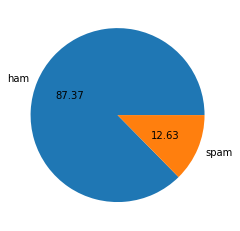

In [25]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [27]:
#data is imbalance

In [28]:
import nltk

In [29]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kushagra\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [30]:
# number of characters

In [ ]:
 df['num_characters'] = df['text'].apply(len)

In [32]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [33]:
# num of words


In [ ]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [35]:
df.head()


,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [ ]:
#number of sentences
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [37]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [38]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.923776,18.619462,2.000000
std,58.174846,13.412185,1.453085
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,2.000000
75%,117.000000,26.000000,3.000000
max,910.000000,220.000000,38.000000


In [39]:
# for ham messages
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.456820,17.241143,1.857174
std,56.356802,13.547067,1.389956
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [40]:
#spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.479326,28.151608,2.987749
std,30.014336,7.128960,1.496367
min,13.000000,2.000000,1.000000
25%,131.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,33.000000,4.000000
max,223.000000,47.000000,9.000000


In [41]:
#let us see this through graphs

In [42]:
import seaborn as sns

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

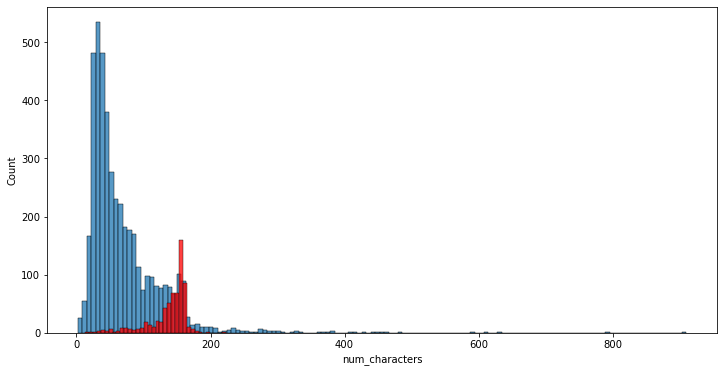

In [43]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<AxesSubplot:xlabel='num_words', ylabel='Count'>

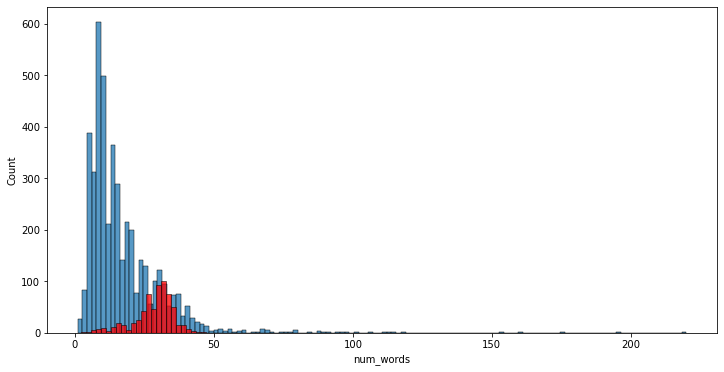

In [44]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

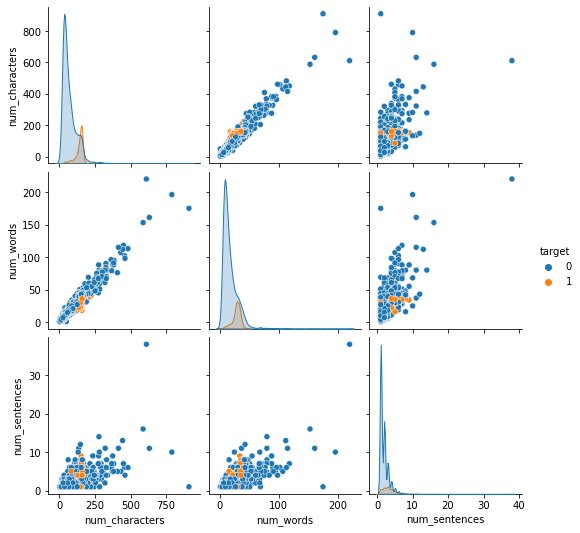

In [45]:
sns.pairplot(df,hue='target')


# 3. Data Preprocessing
Lower case

Tokenization(break into words)

Removing special characters

Removing stop words (ex is,of,the)and punctuation

Stemming(ex dance,dancing)

In [53]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kushagra\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [65]:
from nltk.corpus import stopwords

In [66]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [59]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [56]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [64]:
df['transformed_text'] = df['text'].apply(transform_text)

In [67]:
df.head()


,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [68]:
# wordcloud of spam

In [77]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='black')



In [94]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

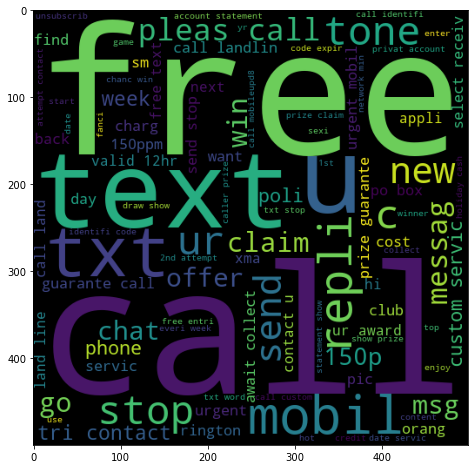

In [95]:
plt.figure(figsize=(15,8))
plt.imshow(spam_wc)

In [88]:
# wordcloud of ham

In [89]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

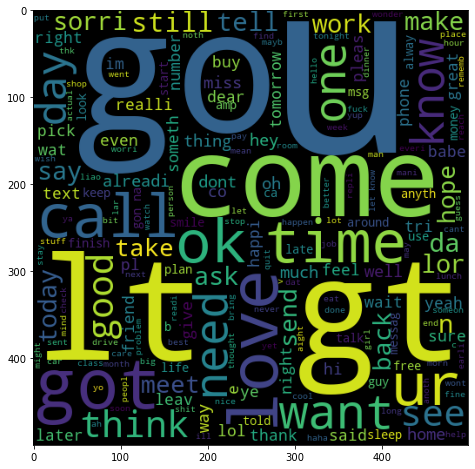

In [92]:
plt.figure(figsize=(15,8))
plt.imshow(spam_wc)

In [96]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [97]:
len(spam_corpus)

10151

C:\Users\kushagra\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


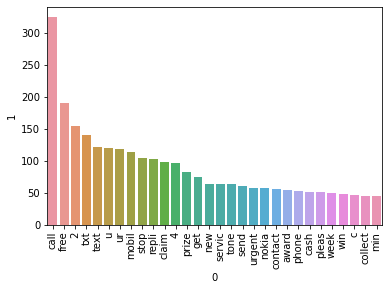

In [98]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [99]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [100]:
len(ham_corpus)

35333

C:\Users\kushagra\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


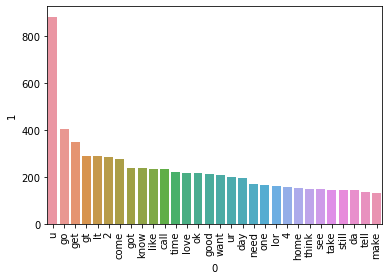

In [101]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

# 4. Model Building

In [139]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)


In [140]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [141]:
X.shape

(5169, 3000)

In [142]:
y = df['target'].values


In [143]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [144]:
from sklearn.model_selection import train_test_split

In [145]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [146]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [147]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [148]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8704061895551257
[[786 110]
 [ 24 114]]
0.5089285714285714


In [149]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))
#no false positive
# precision is more imp than accuracy becuause data is imbalance

0.9729206963249516
[[896   0]
 [ 28 110]]
1.0


In [128]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9816247582205029
[[895   1]
 [ 18 120]]
0.9917355371900827


In [130]:
# we will use tfidf with MNB

In [131]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [132]:
lrc = LogisticRegression()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier()
knc = KNeighborsClassifier()
rfc = RandomForestClassifier()

In [133]:
clfs = {
    
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
}

In [134]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [136]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9729206963249516
Precision -  1.0
For  DT
Accuracy -  0.9516441005802708
Precision -  0.8235294117647058
For  LR
Accuracy -  0.9545454545454546
Precision -  0.9789473684210527
For  RF
Accuracy -  0.9748549323017408
Precision -  0.9827586206896551


In [137]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [138]:
performance_df

,Algorithm,Accuracy,Precision
0,KN,0.905222,1.000000
1,NB,0.972921,1.000000
4,RF,0.974855,0.982759
3,LR,0.954545,0.978947
2,DT,0.951644,0.823529


In [150]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))